In [ ]:
# Importación de librerías
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
# use gpu
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU(s) found:")
    for gpu in gpus:
        print(f"  - Name: {gpu.name}, Device type: {gpu.device_type}")
else:
    print("No GPUs found. Make sure your GPU drivers are installed correctly.")

GPU(s) found:
  - Name: /physical_device:GPU:0, Device type: GPU


In [14]:
# Cargar dataset
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [15]:
# Preprocesamiento
IMG_SIZE = 150

def preprocess(image, label):
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  image = tf.cast(image, tf.float32) / 255.0 # Normalización
  return image, label

In [16]:
# Organizando Dataset
BATCH_SIZE = 32

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [18]:
# Modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [19]:
# Compilar
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [20]:
# Entrenamiento

checkpoint_callback = ModelCheckpoint(
    filepath='modelo_perros_gatos.keras',
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

history = model.fit(
    ds_train,
    validation_data=ds_val,
    epochs=5,
    callbacks=[checkpoint_callback]
)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5667 - loss: 0.7095
Epoch 1: val_accuracy improved from -inf to 0.68981, saving model to modelo_perros_gatos.keras
582/582 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.5668 - loss: 0.7094 - val_accuracy: 0.6898 - val_loss: 0.5862
Epoch 2/5
580/582 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7161 - loss: 0.5596
Epoch 2: val_accuracy improved from 0.68981 to 0.78439, saving model to modelo_perros_gatos.keras
582/582 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.7162 - loss: 0.5594 - val_accuracy: 0.7844 - val_loss: 0.4513
Epoch 3/5
580/582 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7854 - loss: 0.4491
Epoch 3: val_accuracy did not improve from 0.78439
582/582 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.7855 - loss: 0.4490 - val_accuracy: 0.7831 - val_loss: 0.4541
Epoch 4/5
580/582 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8349 - loss: 0.3773
Epoch 4: val_accuracy improved from 0.78439 to 0.82889,

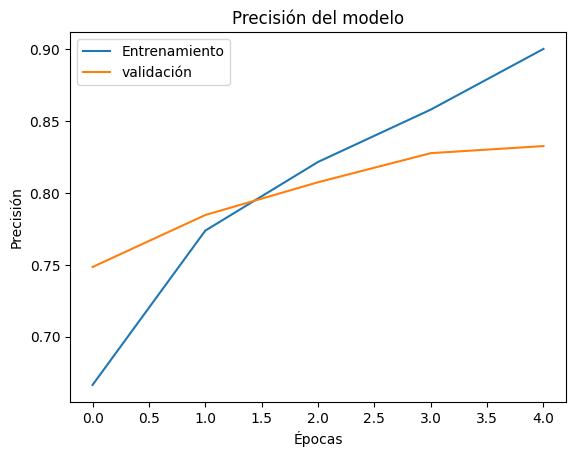

In [11]:
# Gráfica de resultados
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del modelo')
plt.show()